In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(threshold=np.nan)

In [2]:
data = np.loadtxt("nb_05.44.06_1373.dat", unpack=True)
print(data[0])

[ 65.181252  65.624649  66.050713  67.171082  67.333229  68.226593
  68.717712  69.362045  69.434784  69.467117  69.720146  70.239677
  70.210899  70.297867  70.296913  70.747978  70.260933  70.827606
  71.49324   71.583473  72.015938  72.015076  71.92617   72.036545
  72.000023  70.887421  70.689774  71.101105  70.914322  69.987022
  69.517685  68.840263  67.728882  66.517616  65.452385  65.002312
  65.264153  65.840187  65.992043  66.128258  65.844566  65.841858
  65.881721  65.564751  65.107819  64.820419  64.541161  64.492409
  64.149094  63.620991  62.390156  62.654808  62.799385  62.726582
  62.479549  62.761883  63.066292  63.147785  62.96637   62.392178
  61.529285  60.58416   59.452221  60.065235  61.088036  61.37429
  61.906933  61.39262   61.717236  61.956604  61.235672  60.607342
  60.678333  60.313522  60.087032  60.502552  60.695545  60.433075
  60.441036  60.446659  60.026787  59.955414  59.812519  60.10289
  60.170593  60.306152  60.750843  60.983376  61.037106  60.9313

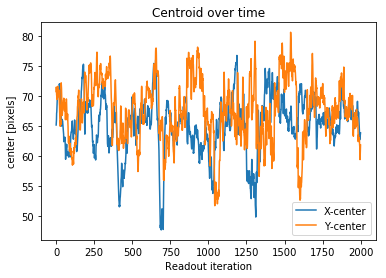

In [3]:
plt.plot (data[0], label="X-center")
plt.plot (data[1], label="Y-center")
plt.legend()
plt.title ("Centroid over time")
plt.xlabel ("Readout iteration")
plt.ylabel ("center [pixels]")
plt.savefig (" nb_05.44.06_1373-xycentroid.png")

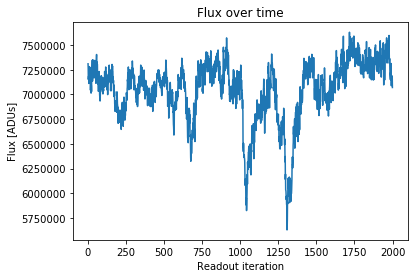

In [4]:
plt.figure()
plt.plot (data[2])
plt.title("Flux over time")
plt.xlabel ("Readout iteration")
plt.ylabel ("Flux [ADUs]")
plt.savefig (" nb_05.44.06_1373-flux.png")

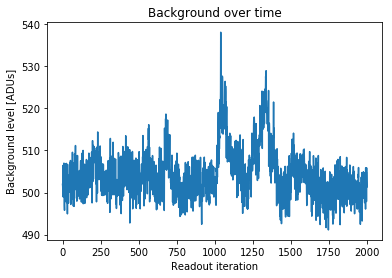

In [5]:
plt.figure()
plt.plot (data[3])
plt.title("Background over time")
plt.xlabel ("Readout iteration")
plt.ylabel ("Background level [ADUs]")
plt.savefig (" nb_05.44.06_1373-background.png")

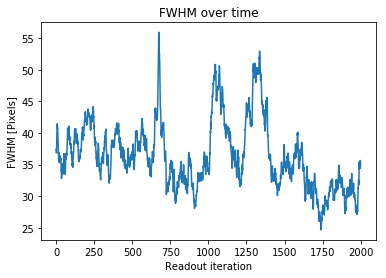

In [6]:
plt.figure()
plt.plot (data[4])
plt.title("FWHM over time")
plt.xlabel ("Readout iteration")
plt.ylabel ("FWHM [Pixels]")
plt.savefig (" nb_05.44.06_1373-fwhm.png")

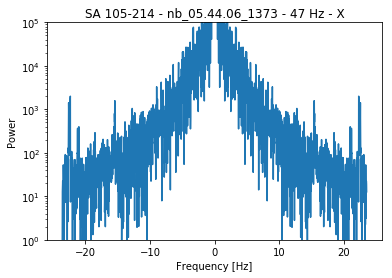

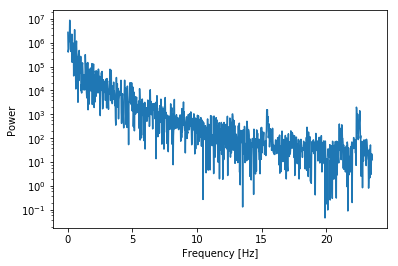

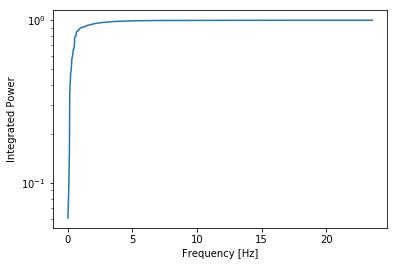

In [7]:
indata = data[0]# - np.mean (data[0])
psX = np.abs (np.fft.fft (indata))**2
time_step = 0.021195 # derive from image header of the input file; change as you use different input files!
freqs = np.fft.fftfreq (indata.size,time_step)
idx = np.argsort (freqs)

_x = freqs[idx]
_y = psX[idx]
plt.plot (_x,_y)
plt.xlabel ("Frequency [Hz]")
plt.ylabel ("Power")
plt.yscale('log')
plt.ylim([1,100000])
plt.title ("SA 105-214 - nb_05.44.06_1373 - 47 Hz - X")
plt.savefig (" nb_05.44.06_1373-powerspectrum.png")

plt.figure()

_cx = freqs[freqs>0]
_cy = psX[freqs>0]

_cy_cum = np.cumsum (_cy)
_cy_cum /= _cy_cum[-1]

plt.yscale('log')
plt.xlabel ("Frequency [Hz]")
plt.ylabel ("Power")
plt.plot (_cx, _cy)
plt.savefig (" nb_05.44.06_1373-power.png")


plt.figure()
plt.plot (_cx, _cy_cum)
plt.yscale('log')
plt.xlabel ("Frequency [Hz]")
plt.ylabel ("Integrated Power")
plt.savefig (" nb_05.44.06_1373-integratedpower.png")

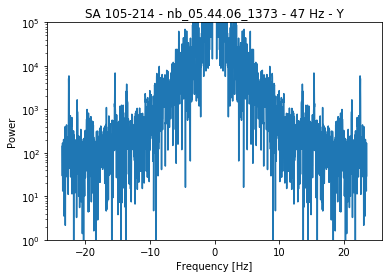

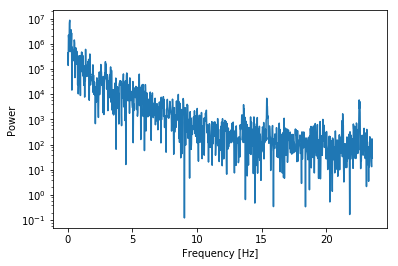

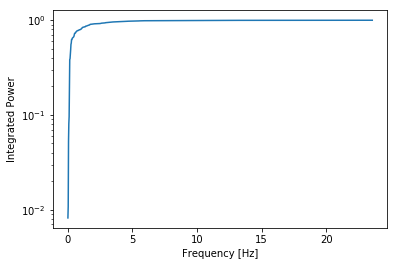

In [8]:
indata = data[1]# - np.mean (data[1])
psX = np.abs (np.fft.fft (indata))**2
time_step = 0.021195 # derive from image header of the input file; change as you use different input files!
freqs = np.fft.fftfreq (indata.size,time_step)
idx = np.argsort (freqs)

_x = freqs[idx]
_y = psX[idx]
plt.plot (_x,_y)
plt.xlabel ("Frequency [Hz]")
plt.ylabel ("Power")
plt.yscale('log')
plt.ylim([1,100000])
plt.title ("SA 105-214 - nb_05.44.06_1373 - 47 Hz - Y")
plt.savefig (" nb_05.44.06_1373-powerspectrum-y.png")

plt.figure()

_cx = freqs[freqs>0]
_cy = psX[freqs>0]

_cy_cum = np.cumsum (_cy)
_cy_cum /= _cy_cum[-1]

plt.yscale('log')
plt.xlabel ("Frequency [Hz]")
plt.ylabel ("Power")
plt.plot (_cx, _cy)
plt.savefig (" nb_05.44.06_1373-power-y.png")


plt.figure()
plt.plot (_cx, _cy_cum)
plt.yscale('log')
plt.xlabel ("Frequency [Hz]")
plt.ylabel ("Integrated Power")
plt.savefig (" nb_05.44.06_1373-integratedpower-y.png")